In [2]:
# imports and loading
from pymodulon.io import *
from pymodulon.plotting import *
from os import path
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

base_dir = '/home/chris/zuniga/iModulonMiner'
data_dir = path.join(base_dir,'data','processed_data')
interim_dir = path.join(base_dir,'data','interim')
proc_dir = path.join(base_dir,'data','processed_data')
CP4_ica_data = load_json_model(path.join(proc_dir,'CP4_ica.json.gz'))
ZM4_ica_data = load_json_model(path.join(proc_dir,'ZM4_ica.json'))

import pandas as pd

import matplotlib.pyplot as plt
import mplcursors
from matplotlib.lines import Line2D

def custom_compare_activities(ica_data, imodulon1, imodulon2, color_by_col = '', **kwargs):
    """
    Create an interactive scatterplot comparing the compendium-wide activities of two iModulons.

    Parameters
    ----------
    ica_data: ~pymodulon.core.IcaData
        :class:`~pymodulon.core.IcaData` object
    imodulon1: int or str
        Name of the iModulon to plot on the x-axis
    imodulon2: int or str
        Name of the iModulon to plot on the y-axis
    **kwargs:
        Additional keyword arguments passed to :func:`pymodulon.plotting.scatterplot`

    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the scatterplot
    """
    
    # Extract data
    x = ica_data.A.loc[imodulon1]
    y = ica_data.A.loc[imodulon2]
    c = ['blue' for _ in x]
    if len(color_by_col) > 0:
        df = ica_data.sample_table[color_by_col]
        change_dict = {val : str(val).split('(')[0] for val in df.unique()}
        df = df.replace(change_dict)
        unique_categories = df.unique()
        cmap = plt.get_cmap('tab20')
        #category_colors = {category: cmap(i / len(unique_categories)) for i, category in enumerate(unique_categories)}
        category_colors = {category: cmap(i) for i, category in enumerate(unique_categories)}
        c = df.map(category_colors).tolist()
        
        
    labels = ica_data.sample_table.full_name.values

    xlabel = f"{imodulon1} iModulon Activity"
    ylabel = f"{imodulon2} iModulon Activity"

    # Remove xlabel, ylabel, and fit_line kwargs if provided
    kwargs.pop("xlabel", None)
    kwargs.pop("ylabel", None)
    kwargs.pop("fit_line", None)

    # Scatter Plot
    fig, ax = plt.subplots(figsize = (10, 5))
    scatter = ax.scatter(x, y, c = c, alpha = 0.8, **kwargs)

    # Set axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Add interactive cursor for hovering
    cursor = mplcursors.cursor(scatter, hover=True)
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.index])  # Show label for hovered point
    
    if len(color_by_col) > 0:
        legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category) 
                       for category, color in category_colors.items()]

        # Add the custom legend
        plt.legend(handles=legend_elements, title=color_by_col, loc='upper left', bbox_to_anchor=(1, 1))
        plt.subplots_adjust(right=.6)
    return ax

#%matplotlib widget


data_dir = base_dir+'/data/external/ica_data_objs/eco'
A = pd.read_csv(path.join(data_dir,'A.csv'), index_col = 0)
X = pd.read_csv(path.join(data_dir,'log_tpm.csv'), index_col = 0)
M = pd.read_csv(path.join(data_dir,'M.csv'), index_col = 0)
iM_table = pd.read_csv(path.join(data_dir, 'iM_table.csv'), index_col = 0)
index_to_iM = {str(index) : row['name'] for index, row in iM_table.iterrows()}
M = M.rename(columns = index_to_iM)
index_to_iM = {int(index) : row['name'] for index, row in iM_table.iterrows()}
A = A.rename(index = index_to_iM)
iM_table = iM_table.set_index('name')

eco_data = IcaData(M = M,
                   A = A,
                   X = X,
                   imodulon_table = iM_table,
                   sample_table = path.join(data_dir,'sample_table.csv'),
                   threshold_method = 'kmeans',
                   optimize_cutoff=True)

/home/chris/miniforge3/envs/iM_miner/lib/python3.10/site-packages/pymodulon/util.py:31: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_json(table)
/home/chris/miniforge3/envs/iM_miner/lib/python3.10/site-packages/pymodulon/util.py:31: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_json(table)
/home/chris/miniforge3/envs/iM_miner/lib/python3.10/site-packages/pymodulon/util.py:31: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_json(table)
/home/chris/miniforge3/envs/iM_miner/lib/python3.10/site-packages/pymodulon/util.py:31: FutureWarning: Passing literal json to 'read_json' 

# compare two within species

In [3]:
# display settings
iM1 = 'transport_1'#'sulfur_transport'#'translation_1'
iM2 = 'nitrogen_fixation'
category = 'Carbon Source (g/L)' #'Growth Rate (1/hr)' #'Carbon Source (g/L)' 'Aerobicity' 'study'
impt_cols = ['gene_name', 'gene_weight', 'gene_product',
       'COG', 'regulator', 'uniprot', 'EC_number',
       'ZM4_locus', 'aerobic_essential', 'anaerobic_essential',
       'chromosome_id']

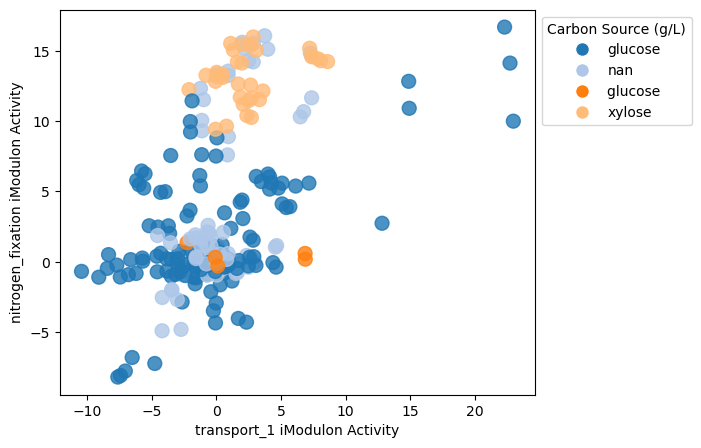

In [4]:
custom_compare_activities(ica_data, iM1, iM2, color_by_col = category, s = 100)
plt.savefig(base_dir+'/figures/compare_activities.pdf', transparent = True)
plt.show()

In [5]:
pd.set_option('display.max_colwidth', None)  # Set to None for unlimited width
ica_data.view_imodulon(iM1)[impt_cols].sort_values(by = 'gene_weight', key = abs, ascending = False)

,gene_name,gene_weight,gene_product,COG,regulator,uniprot,EC_number,ZM4_locus,aerobic_essential,anaerobic_essential,chromosome_id
ZCP4_1340,ZCP4_1340,0.289245,molybdenum-pterin binding domain protein,Coenzyme transport and metabolism,"ZCP4_0265,ZCP4_0523,ZCP4_1046,ZCP4_1382,ZCP4_1585,ZCP4_1718",Q5NLE8,NaN,ZMO1_ZMO1838,0.000000,0.000000,CP006818.1
ZCP4_1332,ZCP4_1332,0.241643,ABC-type Fe3+-hydroxamate transport system%2C periplasmic component,Inorganic ion transport and metabolism,"ZCP4_0018,ZCP4_0128,ZCP4_0265,ZCP4_1382,ZCP4_1387,ZCP4_1718",Q5NLD8,NaN,ZMO1_ZMO1848,0.000000,0.000000,CP006818.1
ZCP4_1749,ZCP4_1749,0.238548,transcriptional regulator%2C AraC family,Transcription,"ZCP4_0375,ZCP4_1382,ZCP4_1387,ZCP4_1387",Q5NMQ6,NaN,ZMO1_ZMO1380,0.000000,0.000000,CP006818.1
ZCP4_1362,ZCP4_1362,0.206583,Nif-specific regulatory protein,Transcription,NaN,Q5NLH0,NaN,ZMO1_ZMO1816,0.000000,0.000000,CP006818.1
ZCP4_1750,ZCP4_1750,0.177515,ethanolamine:proton symporter%2C EAT family,Amino acid transport and metabolism,NaN,NaN,NaN,ZMO1_ZMO1378,0.000000,0.000000,CP006818.1
ZCP4_0718,ZCP4_0718,0.174513,PLP-dependent enzyme%2C histidinol-phosphate/aromatic aminotransferase or cobyric acid decarboxylase,Amino acid transport and metabolism,NaN,Q5NQ21,2.6.1.9,ZMO1_ZMO0562,0.000000,0.000000,CP006818.1
ZCP4_0910,ZCP4_0910,0.172327,Putative MetA-pathway of phenol degradation,Energy production and conversion,"ZCP4_0128,ZCP4_0210,ZCP4_0375,ZCP4_0375,ZCP4_1382,ZCP4_1387,ZCP4_1465,ZCP4_1637,ZCP4_1718",Q5NQL9,NaN,ZMO1_ZMO0361,0.000000,0.000000,CP006818.1
ZCP4_1333,ZCP4_1333,0.164500,ABC-type Fe3+-siderophore transport system%2C permease component,Inorganic ion transport and metabolism,"ZCP4_0265,ZCP4_1387,ZCP4_1387",H2VFP3,NaN,ZMO1_ZMO1847,0.000000,0.000000,CP006818.1
ZCP4_0790,ZCP4_0790,0.154578,nitrogen regulatory protein P-II family,Transcription,NaN,Q5NQ89,NaN,ZMO1_ZMO0492,0.000000,0.000000,CP006818.1
ZCP4_0049,ZCP4_0049,0.148044,outer membrane cobalamin receptor protein,Inorganic ion transport and metabolism,"ZCP4_0018,ZCP4_0128,ZCP4_0375,ZCP4_0523,ZCP4_0530,ZCP4_1194,ZCP4_1382,ZCP4_1718",Q5NMY8,NaN,ZMO1_ZMO1986,0.000000,0.000000,CP006818.1


In [6]:
ica_data.view_imodulon(iM2)[impt_cols].sort_values(by = 'gene_weight', key = abs, ascending = False)

,gene_name,gene_weight,gene_product,COG,regulator,uniprot,EC_number,ZM4_locus,aerobic_essential,anaerobic_essential,chromosome_id
ZCP4_1354,ZCP4_1354,0.307049,Mo-nitrogenase MoFe protein subunit NifD precursor,Energy production and conversion,NaN,Q5NLG2,1.18.6.1,ZMO1_ZMO1824,0.0,0.0,CP006818.1
ZCP4_1355,nifH,0.298938,Mo-nitrogenase iron protein subunit NifH,"Cell cycle control, cell division, chromosome partitioning",NaN,Q5NLG3,"1.18.6.1,1.3.7.7",ZMO1_ZMO1823,0.0,0.0,CP006818.1
ZCP4_1353,ZCP4_1353,0.276871,Mo-nitrogenase MoFe protein subunit NifK,Energy production and conversion,NaN,Q5NLG1,1.18.6.1,ZMO1_ZMO1825,0.0,0.0,CP006818.1
ZCP4_1351,ZCP4_1351,0.227765,nitrogenase molybdenum-iron cofactor biosynthesis protein NifN,Coenzyme transport and metabolism,NaN,Q5NLF9,NaN,ZMO1_ZMO1827,0.0,0.0,CP006818.1
ZCP4_1349,ZCP4_1349,0.222304,putative nitrogen fixation protein,Function unknown,ZCP4_0900,Q5NLF7,NaN,ZMO1_ZMO1829,0.0,0.0,CP006818.1
ZCP4_1352,ZCP4_1352,0.221687,nitrogenase molybdenum-iron cofactor biosynthesis protein NifE,Energy production and conversion,NaN,Q5NLG0,NaN,ZMO1_ZMO1826,0.0,0.0,CP006818.1
ZCP4_1346,ZCP4_1346,0.209056,Iron-sulfur cluster assembly accessory protein,Function unknown,NaN,NaN,NaN,ZMO1_ZMO1832,0.0,0.0,CP006818.1
ZCP4_1350,ZCP4_1350,0.196051,nitrogen fixation protein NifX,Function unknown,NaN,Q5NLF8,NaN,ZMO1_ZMO1828,0.0,0.0,CP006818.1
ZCP4_1348,ZCP4_1348,0.186421,ferredoxin III%2C nif-specific,Energy production and conversion,NaN,D9PNM8,NaN,ZMO1_ZMO2028,0.0,0.0,CP006818.1
ZCP4_1344,ZCP4_1344,0.138938,cysteine desulfurase NifS,Coenzyme transport and metabolism,NaN,NaN,2.8.1.7,ZMO1_ZMO1834,0.0,0.0,CP006818.1


In [7]:
df = ica_data.sample_table
samps = df[df['study'] == 'ethanologens_ferment'].index
bby_A = ica_data.A[samps]
bby_A['mean'] = abs(bby_A).mean(axis = 1)
bby_A.sort_values(by = 'mean', key = abs, ascending = False).head()

/tmp/ipykernel_10288/1174600638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bby_A['mean'] = abs(bby_A).mean(axis = 1)


,SRX5329169,SRX5329170,SRX5329171,SRX5329172,SRX5329173,SRX5329174,SRX5329175,SRX5329176,SRX5329177,SRX5329178,...,SRX5329186,SRX5329187,SRX5329188,SRX5329189,SRX5329190,SRX5329191,SRX5329192,SRX5329193,SRX5329194,mean
translation_1,-19.068447,0.496391,-0.204973,-19.633593,-10.986669,2.909821,-1.155018,-15.874779,1.250129,-21.103399,...,-21.364896,-13.623367,-17.419898,-21.601870,-21.447648,-21.342877,-10.712371,-13.828143,1.734090,12.157167
nitrogen_fixation,13.566857,-0.434658,0.489943,14.309458,9.318660,-0.263021,-0.134102,13.257256,-0.393272,14.225642,...,15.565945,11.535500,13.357999,16.086894,15.164401,15.128054,8.902487,12.334899,-0.947350,8.997738
motility,-11.122430,-0.393978,-5.448388,-13.054859,-11.548374,-3.065194,-4.583000,-15.177976,-2.455192,-12.310056,...,-9.067171,-13.421108,-11.757509,-8.210655,-8.910599,-13.438679,-10.292713,-15.857675,-5.676033,8.879130
glycolysis_and_ATP_synthase,-9.280084,0.473194,-0.422106,-12.199288,-3.285730,-0.144011,1.214841,-10.990825,-0.528180,-9.156500,...,-18.649176,-6.372871,-10.372200,-16.512211,-16.973777,-16.949538,-2.818850,-6.374612,0.336287,7.453166
siderophore_receptor,-8.563226,-2.272171,-0.630287,-8.851163,-7.277762,-12.514311,-11.995157,-8.686614,-10.012886,-7.582308,...,-3.460327,-6.718352,-8.804349,-2.854772,-3.172989,-8.632750,-5.913533,-10.280110,-9.163993,6.952528


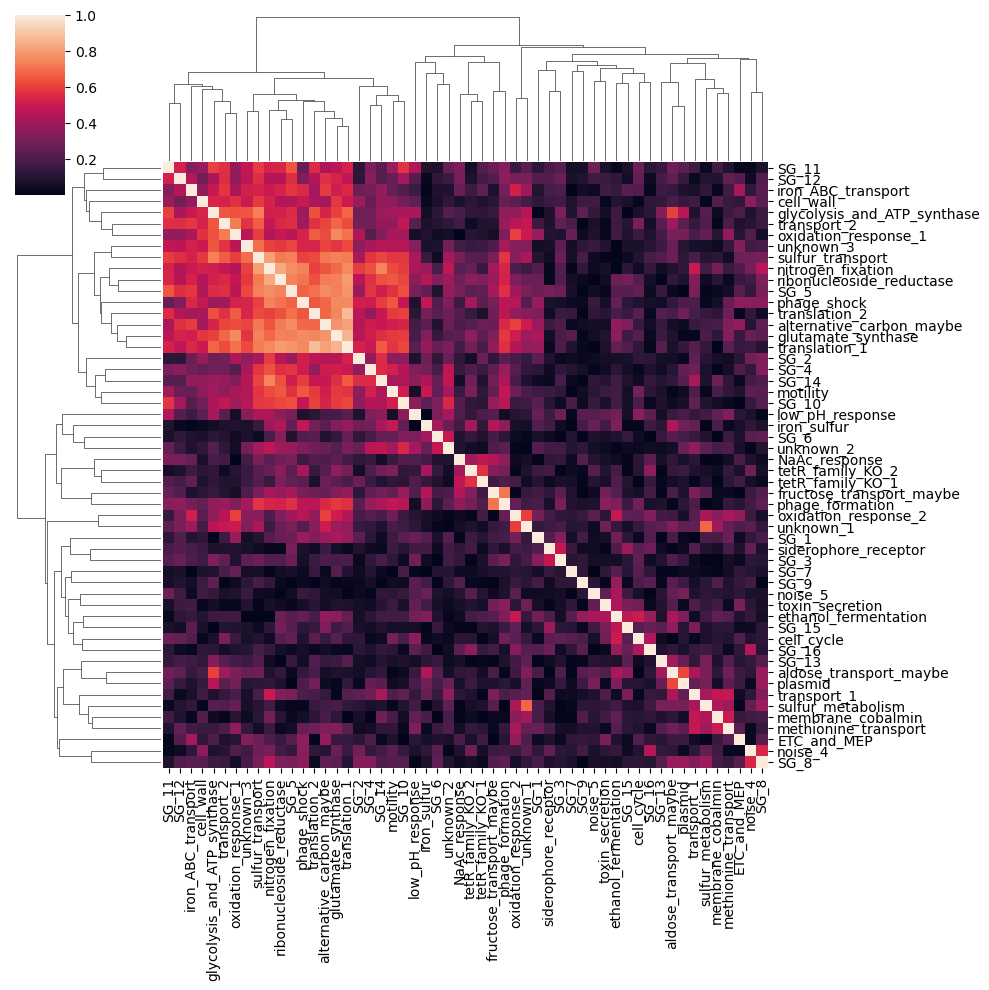

In [8]:
sns.clustermap(abs(ica_data.A.T.corr()), xticklabels=True, yticklabels=True)
plt.show()

# looking into specific metadata activities

In [9]:
df = ica_data.sample_table
samples = df[df['Aerobicity'] == 'aerobic'].index
df_A = ica_data.A[samples].copy()
df_A['mean'] = df_A.mean(axis = 1)
df_A.sort_values(by = 'mean', key = abs, ascending = False).head()

,Kiley_A_DZM0422_Aerobic_A,Kiley_A_DZM0422_Aerobic_B,Kiley_A_DZM0422_Aerobic_C,Kiley_A_WT_Aerobic_A,Kiley_A_WT_Aerobic_B,Kiley_A_WT_Aerobic_C,SRX5252028,SRX5252029,SRX5252030,SRX5252031,...,Kiley_B_WT_+O2_Ctrl_C,Kiley_B_WT_+O2_Paraquat_A,Kiley_B_WT_+O2_Paraquat_B,Kiley_B_WT_+O2_Paraquat_C,SRX3316537,SRX3316540,SRX3316548,SRX3316550,SRX3316559,mean
oxidation_response_2,9.885250,10.122263,9.639106,9.723516,9.801443,9.667196,1.935491,1.216663,0.452221,9.252472,...,2.888938,14.523500,11.742961,14.180787,3.547148,-0.948046,4.825983,0.466309,4.117780,7.025186
ethanol_fermentation,7.335280,9.484871,7.700632,6.088402,5.668351,5.148396,5.028618,4.361037,2.815592,14.148814,...,6.278454,10.941776,10.221641,9.757518,15.018631,7.263589,17.329134,-0.583992,0.879319,6.446502
translation_1,-3.246716,-3.712392,-3.099570,-2.675524,-2.152655,-2.530814,0.752139,-7.240714,-9.758808,6.202788,...,-1.680727,-1.421172,-1.527749,-1.645034,-19.830110,-1.733975,-15.468173,-1.906342,2.426253,-6.240733
glycolysis_and_ATP_synthase,-4.363338,-3.650912,-4.696930,-4.865312,-4.761241,-4.573273,0.855035,-5.548183,-7.586546,5.078602,...,-3.430489,-3.448092,-2.576045,-3.613110,-0.774420,0.402457,7.548233,1.312865,-6.648557,-5.071981
SG_8,1.122896,0.296626,0.725419,0.846621,0.494665,0.014876,-0.836782,-9.206699,-8.085259,-2.282595,...,-0.953486,-0.649410,-0.640160,-1.191081,3.433704,0.709880,3.248443,0.440836,-1.444246,-3.716263


In [10]:
df = ica_data.sample_table
samples = df[df['Carbon Source (g/L)'] == 'xylose'].index
df_A = ica_data.A[samples].copy()
df_A['exp_var'] = ica_data.imodulon_table['explained_variance'].loc[df_A.index]
df_A['std_dev'] = df_A.std(axis = 1)
df_A['mean'] = df_A.mean(axis = 1)
df_A = df_A[df_A.columns[::-1]]
df_A = df_A[df_A['exp_var'] > 0.02]
df_A.sort_values(by = 'mean', key = abs, ascending = False)

,mean,std_dev,exp_var,SRX3541453,SRX3541452,SRX3541451,SRX3541450,SRX3541449,SRX3541445,SRX3541444,...,SRX6700183,SRX6700182,SRX6700181,SRX6700180,SRX6700173,SRX6700172,SRX6700171,SRX6700170,SRX6700169,SRX6700168
translation_1,-17.076086,4.464851,0.064288,-16.723998,-17.130700,-19.420271,-17.039259,-16.840681,-12.823876,-14.454336,...,-21.604583,-14.757824,-14.926019,-15.347307,-21.794321,-23.117117,-20.199043,-14.821889,-15.055730,-14.018694
nitrogen_fixation,12.497279,2.870948,0.024464,11.659404,11.715183,11.539513,12.154704,11.209166,9.431653,9.647964,...,14.440489,12.844351,13.341014,13.117435,15.197360,14.607092,14.597009,12.575175,12.651490,11.470131
glycolysis_and_ATP_synthase,-10.130239,5.483293,0.027824,-17.045236,-16.090108,-16.125966,-14.909694,-15.369655,-8.762317,-7.673726,...,-10.095521,-2.401455,-3.366530,-1.970703,-10.386846,-9.580284,-7.341944,-3.769619,-3.342233,-2.412620
phage_formation,8.623954,2.237687,0.024910,8.966342,8.782168,10.898162,10.995466,8.599329,7.331107,7.363011,...,9.854268,7.958024,8.366785,8.241637,10.098000,7.965941,8.610931,7.441289,8.039905,6.802368
fructose_transport_maybe,8.020540,2.608079,0.027960,7.648177,8.122629,9.501770,9.571610,8.182888,6.208180,7.974434,...,11.497616,5.902347,6.564173,6.724097,12.810017,12.428179,12.031415,7.091360,7.197710,6.287272
ethanol_fermentation,-1.995385,2.431559,0.036682,-3.974790,-3.818856,-3.773826,-2.786806,-3.667038,-3.204136,-1.314944,...,-1.615837,3.387649,1.270713,3.711692,-6.089410,-4.758915,-4.595090,-1.760358,0.225784,-0.392535


# comparing between species

In [4]:
from pymodulon.compare import *

#ecoli_gb= base_dir+'/data/external/GenBank/eco.gb'
#ecoli_out = base_dir+'/data/external/GenBank/eco_prot.fasta'
#make_prots(ecoli_gb, ecoli_out)
#make_prot_db(ecoli_out)

CP4_gb = base_dir+'/data/external/GenBank/zym_CP4.gb'
CP4_out = base_dir+'/data/external/GenBank/zym_CP4_prot.fasta'
make_prots(CP4_gb, CP4_out)
make_prot_db(CP4_out)

ZM4_gb = base_dir+'/data/external/GenBank/zym_ZM4.gb'
ZM4_out = base_dir+'/data/external/GenBank/zym_ZM4_prot.fasta'
make_prots(ZM4_gb, ZM4_out)
make_prot_db(ZM4_out)

bbh_df = get_bbh(ZM4_out, CP4_out, outdir = base_dir+'/data/external/GenBank/output')

BLAST DB files already exist
BLAST DB files already exist
blasting /home/chris/zuniga/iModulonMiner/data/external/GenBank/zym_ZM4_prot.fasta vs /home/chris/zuniga/iModulonMiner/data/external/GenBank/zym_CP4_prot.fasta
running blastp with following command line...
blastp -db /home/chris/zuniga/iModulonMiner/data/external/GenBank/zym_ZM4_prot.fasta -query /home/chris/zuniga/iModulonMiner/data/external/GenBank/zym_CP4_prot.fasta -out /home/chris/zuniga/iModulonMiner/data/external/GenBank/output/zym_CP4_prot_vs_zym_ZM4_prot.txt -evalue 0.001 -outfmt 6 -num_threads 1
blasting /home/chris/zuniga/iModulonMiner/data/external/GenBank/zym_CP4_prot.fasta vs /home/chris/zuniga/iModulonMiner/data/external/GenBank/zym_ZM4_prot.fasta
running blastp with following command line...
blastp -db /home/chris/zuniga/iModulonMiner/data/external/GenBank/zym_CP4_prot.fasta -query /home/chris/zuniga/iModulonMiner/data/external/GenBank/zym_ZM4_prot.fasta -out /home/chris/zuniga/iModulonMiner/data/external/GenBank

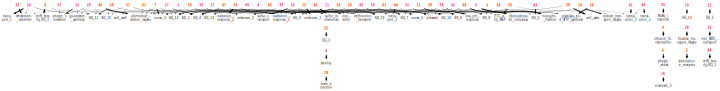

In [9]:
links,dots = compare_ica(ZM4_ica_data.M, CP4_ica_data.M, 
                         ortho_file = bbh_df,#'../data/external/GenBank/output/zym_prot_vs_eco_prot.txt',
                         cutoff = 0.1)
dots

In [10]:
for link in links:
    print(str(link)[1:-1])

np.int64(0), 'nitrogen_fixation', np.float64(0.9146554969496257)
np.int64(0), 'SG_9', np.float64(0.1529810485506878)
np.int64(0), 'SG_16', np.float64(0.1101734061405968)
np.int64(1), 'SG_1', np.float64(0.12202396690674257)
np.int64(1), 'unknown_2', np.float64(0.11134334601761513)
np.int64(1), 'SG_12', np.float64(0.1217640415776205)
np.int64(2), 'siderophore_receptor', np.float64(0.9734515511761869)
np.int64(3), 'motility', np.float64(0.8460532113599856)
np.int64(4), 'noise_5', np.float64(0.11138016960270133)
np.int64(4), 'SG_1', np.float64(0.1305603845892384)
np.int64(5), 'SG_8', np.float64(0.10966855299158423)
np.int64(5), 'SG_16', np.float64(0.12056872548379335)
np.int64(6), 'phage_shock', np.float64(0.8510216159652785)
np.int64(7), 'SG_4', np.float64(0.16732393310325838)
np.int64(7), 'noise_4', np.float64(0.714923575540996)
np.int64(7), 'alternative_carbon_maybe', np.float64(0.14677536798219323)
np.int64(8), 'SG_11', np.float64(0.12409724617734615)
np.int64(8), 'tetR_family_KO_2', n

In [ ]:
len(links)